Matplotlib and Seaborn
===================

## Overview

- Exploring `matplotlib` styles and plot types

- Using `Seaborn`

## Acknowledgments
- Some of the examples in this unit are taken from: [Python Crash Course - A Hands-on, Project-based, introduction to programming](https://www.amazon.co.uk/Python-Crash-Course-Hands-Project-Based/dp/1593276036)

- This slide deck is also inspired on Jake VanderPlas' _Python Data Science Handbook_,  [Chapter 4](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
  
- This unit was created with the immense help of [Mr. Jomar Alcantara](https://github.com/joealcantara/) from Aston University, UK.

In [50]:
# Set up our Notebook environment
%matplotlib inline

# Import modules and functions
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Set display options
pd.set_option('display.max_row', 200)
pd.set_option('display.max_columns', 60)
warnings.simplefilter('ignore')

## Exploring matplotlib

- Let's start by creating a function that outputs two types of plots. 

- We'll use it to explore some of `matplotlib`'s main features.

In [51]:
def hist_and_lines():
    rng = np.random.RandomState(0) # Set random seed, for reproducibility
    
    # plt.subplots() prepares a plotting canvas composed of 
    # several subplots - in this case, a [1 x 2] matrix of plots
    fig, ax = plt.subplots(1, 2, 
                          figsize = [12, 6])
    
    # The first subplot will have a histogram
    ax[0].hist(rng.randn(1000))
    
    # The second subplot will contain a line plot with 3 lines
    for i in range(3):
        ax[1].plot(rng.rand(20))

    # Set legend for second subplot
    ax[1].legend(['a', 'b', 'c'], loc = 'lower left')

- Let's see that this looks like. Note that by default `matplotlib` uses the 'classic' style

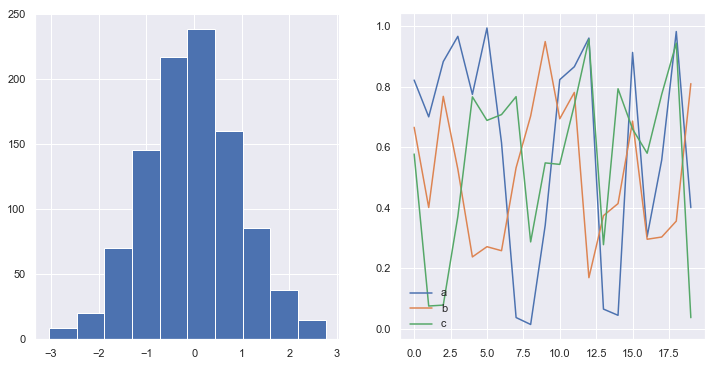

In [52]:
hist_and_lines()

- Not bad, but we can make it look (a lot) better using different styles. 

- As we mentioned earlier in the module, there are a lot of styles available:

In [53]:
plt.style.available[:]

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

- For instance, we can generate plots with the general 'look and feel' of the graphs from the popular data science website [fivethirtyeight.com](http://fivethirtyeight.com):

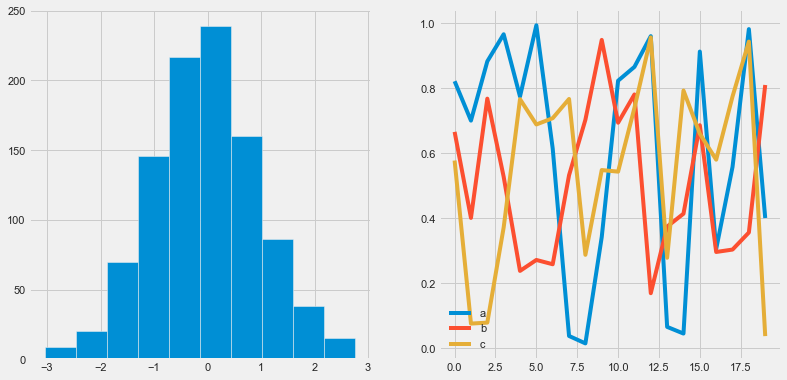

In [54]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

- Or from `ggplot2`...

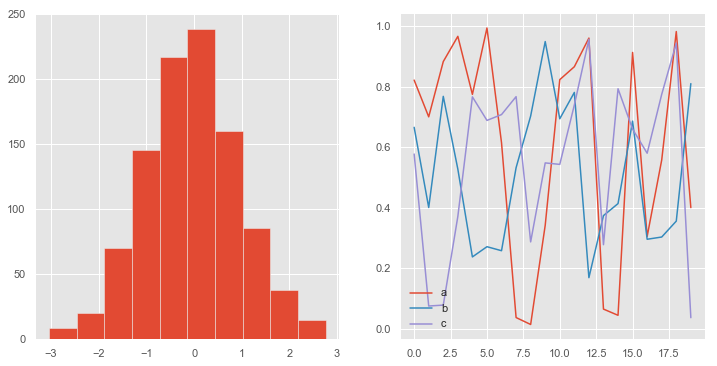

In [55]:
with plt.style.context('ggplot'):
    hist_and_lines()

- Or try some of the others:

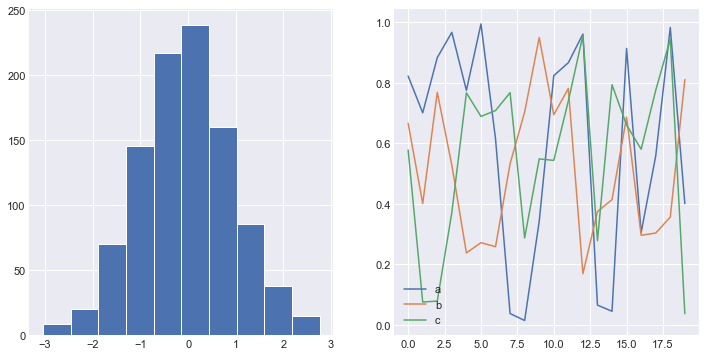

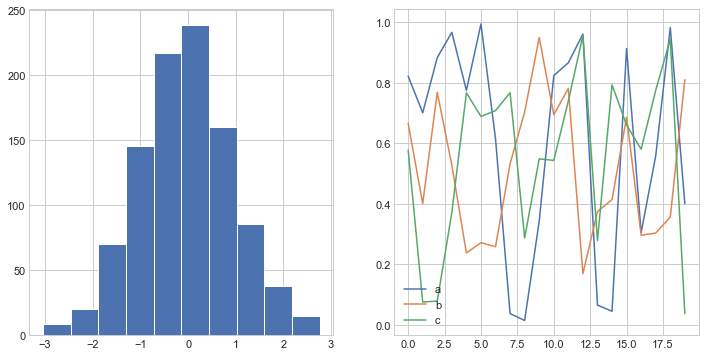

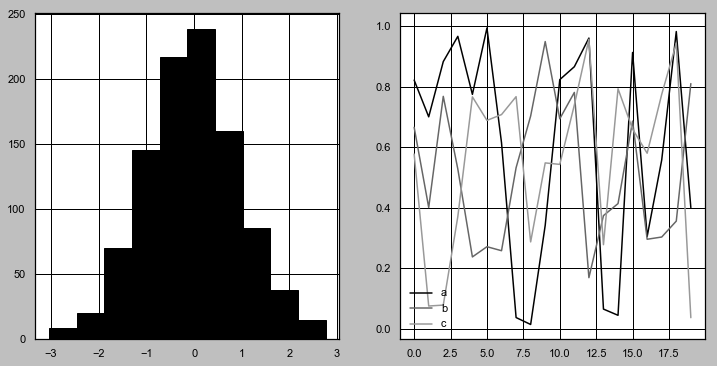

In [56]:
with plt.style.context('seaborn-darkgrid'):
    hist_and_lines()

with plt.style.context('seaborn-whitegrid'):
    hist_and_lines()
    
with plt.style.context('grayscale'):
    hist_and_lines()


- Before we proceed, let's create a small dataset to work with:

In [57]:
# Let's create some data to work with. 
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
            'pre_score':  [4, 24, 31, 2, 3],
            'mid_score':  [25, 94, 57, 62, 70],
            'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, 
                  columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])

# Create a list of the mean scores for each numeric variable
mean_values = [df['pre_score'].mean(), 
               df['mid_score'].mean(), 
               df['post_score'].mean()]

# Create a list with the standard errors of the mean for each variable, 
# which can be calculated as the sstandard deviation divided by the square 
# root of the number of observations
std_err = [df['pre_score'].std(), 
           df['mid_score'].std(), 
           df['post_score'].std()] / np.sqrt(df.shape[0])

print(df)

  first_name  pre_score  mid_score  post_score
0      Jason          4         25           5
1      Molly         24         94          43
2       Tina         31         57          23
3       Jake          2         62          23
4        Amy          3         70          51


- `Matplotlib` works in layers, but with a different principle than that of `ggplot2`. 

    - In `ggplot2` the layered structure is based on the [layered grammar of graphics](https://vita.had.co.nz/papers/layered-grammar.pdf) - i.e., layers refer to fundamental components of the plot - data, stats, aesthetic mappings, and so on. 
    
    - In `matplotlib`, the layers are essentially related to adding new graphical elements (e.g., grids etc). As with other aspects of this library, it resembles the way things are (or were) done in `Matlab`.

- For instance, let's see what the data above looks like. For that, we can start with a classic bar chart, coupled with error bars.

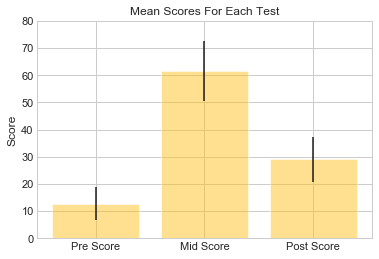

In [58]:
# Let's first set the theme to something aesthetically pleasing
plt.style.use('seaborn-whitegrid')

# Set the bar labels
bar_labels = ['Pre Score', 'Mid Score', 'Post Score']

# Create the x position of the bars
x_pos = list(range(len(bar_labels)))

# Create the plot bars 
plt.bar(x_pos,             # in the desired x positions
        mean_values,       # using the data from the mean_values
        yerr = std_err,    # with y-error lines given by the standard errors
        align = 'center',  # aligned in the center  
        color = '#FFC222', # set colour
        alpha = 0.5)       # alpha 0.5 (semitransparent)

# We now add different graphical elements
# plt.grid() # <--- no need since the theme already has a grid

max_y = max(zip(mean_values, std_err))      # returns a tuple with the max of both variables
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])  # set height of the y-axis

# set axes labels and title
plt.ylabel('Score')
plt.xticks(x_pos, bar_labels)
plt.title('Mean Scores For Each Test');

# You need this command if you are not using a Jupyter Notebook, 
# in order for the complete plot to show:
# plt.show()

## Expanding some more

- To further investigate the capabilities of `matplotlib`, let's get a dataset with really relevant information, containing data related to Game of Thrones' _War of Five Kings_ events:

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/chrisalbon/war_of_the_five_kings_dataset/master/5kings_battles_v1.csv')
print("Size of this dataset:", df.shape)
df.head()

Size of this dataset: (38, 25)


,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


- Now that we have this very, **very** relevant piece of data in our hands, let's explore it a little bit to see what we can discover about the battles taking place in the years 298-300 of the Westerosi calendar

(before you ask: no, I haven't watched the series)

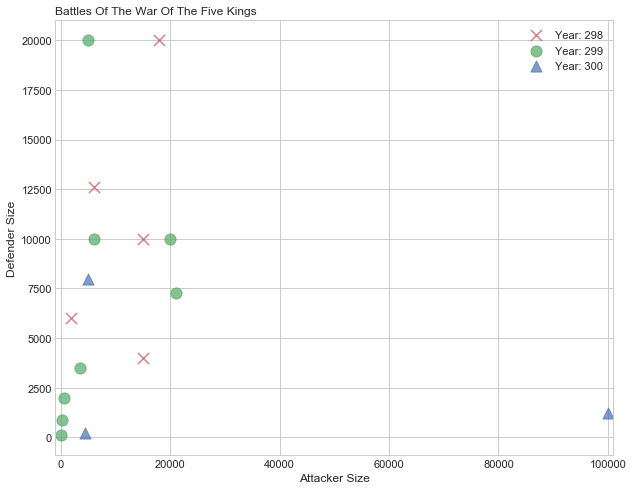

In [60]:
# Create a figure
plt.figure(figsize = (10, 8))

marks = ['x', 'o', '^']
cols  = ['r', 'g', 'b']

# Generate scatterplots for each year of the war
for i in np.arange(3):
    # Extract info for the year
    df2 = df.query('year == ' + str(i + 298))
    
    # Create scatterplot of:
    plt.scatter(df2['attacker_size'], # attacker size in x axis
                df2['defender_size'], # defender size in y axis 
                marker = marks[i], 
                color  = cols[i],
                alpha  = 0.7,
                s      = 124, # size
                label = 'Year: ' + str(298 + i))

# Set chart title
plt.title('Battles Of The War Of The Five Kings', loc = 'left')

# y label
plt.ylabel('Defender Size')

# x label
plt.xlabel('Attacker Size')

# and a legend
plt.legend(loc = 'upper right')

# set the figure boundaries
plt.xlim([min(df['attacker_size']) - 1000, max(df['attacker_size']) + 1000])
plt.ylim([min(df['defender_size']) - 1000, max(df['defender_size']) + 1000]);

# plt.show() # <--- needed if not using a Notebook.

- Notice the extreme outlier at the right end of the plot, a battle so massively unbalanced that would make Leonidas and his 300 Spartans feel sorry for the defenders. Let's explore this dataset a bit more, but removing that outlier to be able to better focus on the remaining data:

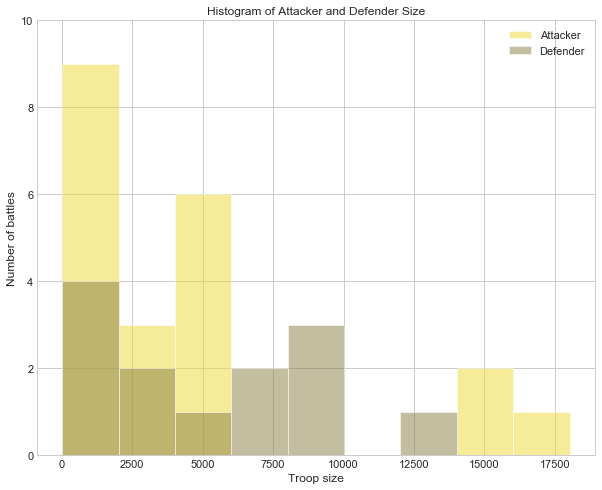

In [61]:
# Extract two variables with attacker and defender size, 
# filtering out the outlier
data1 = df.query('attacker_size < 40000')['attacker_size']
data2 = df.query('attacker_size < 40000')['defender_size']

# Create bins of width 2000
bins = np.arange(data1.min(), data2.max(), 2000) # fixed bin size

fig = plt.figure(figsize = (10, 8))

# Plot a histogram of attacker sizes
plt.hist(data1, 
         bins  = bins, 
         alpha = 0.5, 
         color = '#EDD834',
         label = 'Attacker')

# Overlay a histogram of defender sizes
plt.hist(data2, 
         bins  = bins, 
         alpha = 0.5, 
         color = '#887E43',
         label = 'Defender')

# Adjust the y boundaries of the figure
plt.ylim([0, 10])

# Set title and labels
plt.title('Histogram of Attacker and Defender Size')
plt.xlabel('Troop size')
plt.ylabel('Number of battles')
plt.legend(loc = 'upper right')

plt.show() # unnecessary here, but innocuous if used

## Saving and loading figures

- Saving figures to file is quite straightforward. We created a figure object called `fig` using `plt.figure()` (look again at the code cell above), and now we can simply do:

In [62]:
# Uncomment to run (if you want to):
# fig.savefig('my_figure.png')

- It is also possible to load a figure from a file into a Jupyter notebook:

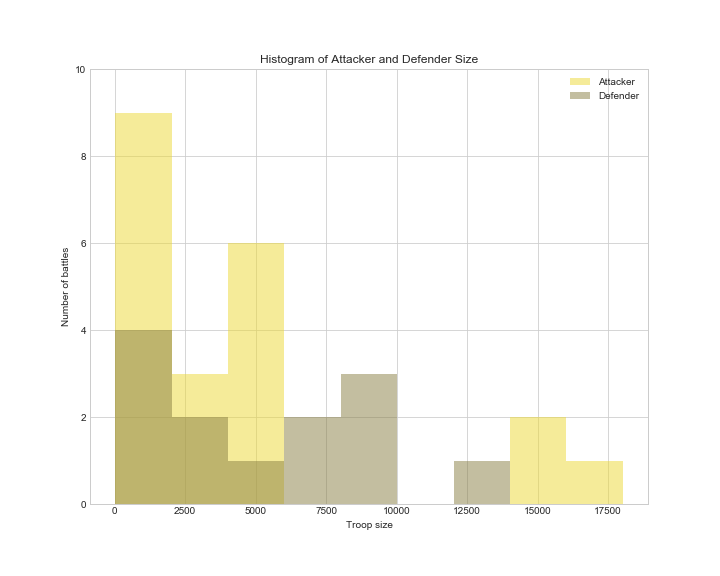

In [63]:
from IPython.display import Image
Image('my_figure.png')

## Using Seaborn

- `Matplotlib` has proven to be an incredibly useful visualization tool, but even avid users will admit it often leaves much to be desired. Usual complaints include 

    - its legacy "look and feel", which was based in the `Matlab` of 20 years ago
    
    - the difficulty in generating sophisticated statistical visualization 
    
    - the difficulty in working with Pandas DataFrames (since `Matplotlib` predated `Pandas` by more than 10 years)

- Seaborn was created to address all these problems. It provides an API on top of `Matplotlib` that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by `Pandas` DataFrames.

In [64]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

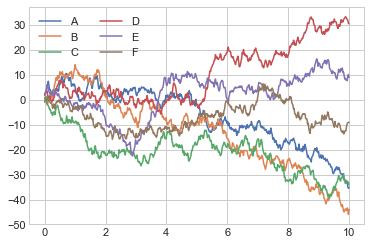

In [65]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', 
             ncol = 2, loc = 'upper left');

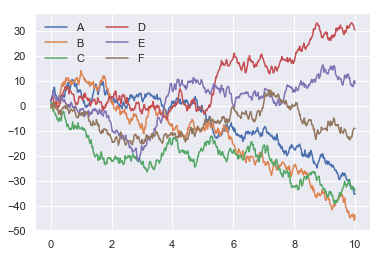

In [66]:
# Lets use seaborn instead and run the same command as above
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', 
             ncol = 2, loc = 'upper left');

## More useful visalisations: scatterplot matrix

In [67]:
iris = sns.load_dataset("iris") # Seaborn comes with a number of example datasets
print("Dataset size: " + str(iris.shape))
iris.head()

Dataset size: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


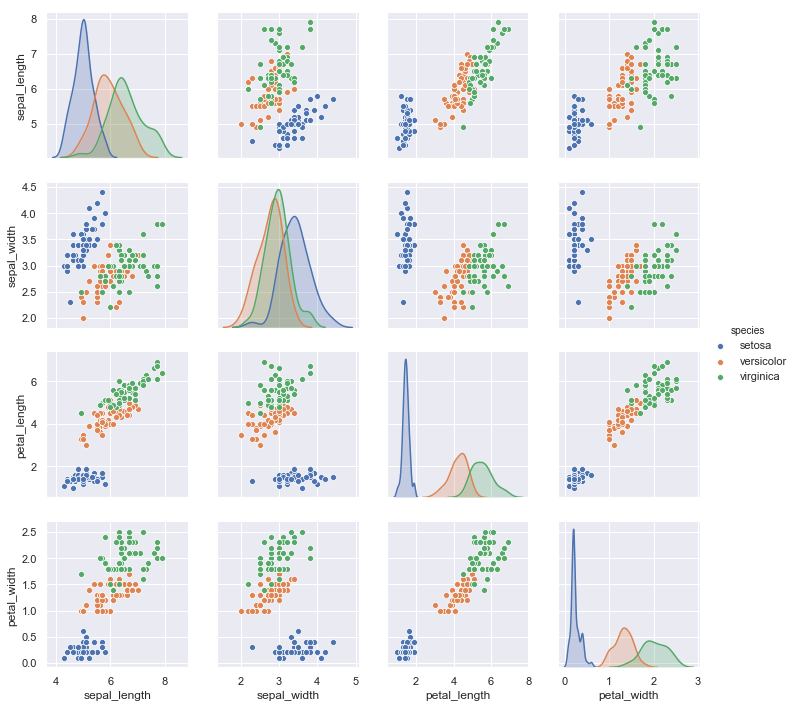

In [68]:
sns.pairplot(iris, hue = 'species', height = 2.5);

## Errorbars

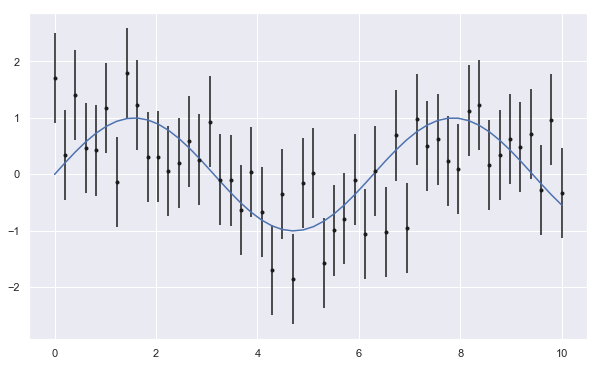

In [70]:
plt.figure(figsize = (10, 6))
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, 
             yerr = dy, 
             fmt  = '.k'); # fmt gets the formatting string
plt.plot(x, np.sin(x), '-b');

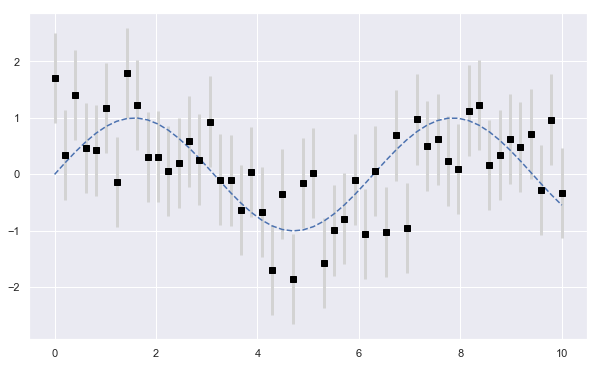

In [73]:
# Play a little more with other options
plt.figure(figsize = (10, 6))
plt.errorbar(x, y, 
             yerr = dy, fmt = 's', color = 'black',
             ecolor = 'lightgray', 
             elinewidth = 3, 
             capsize = 0);
#plt.plot(x, y, alpha = 0.5);
plt.plot(x, np.sin(x), '--b');

## Histograms and Density Plots, Seaborn style

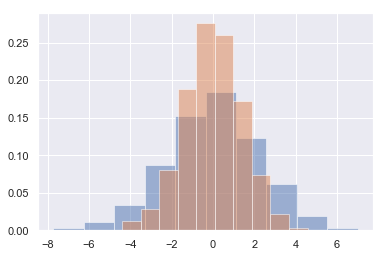

In [76]:
# Create some data
data = np.random.multivariate_normal([0, 0],           # Mean vector
                                     [[5, 2], [2, 2]], # Covariance matrix
                                     size = 2000)      # Number of points
data = pd.DataFrame(data, 
                    columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], 
              density = True, 
              alpha = 0.5)

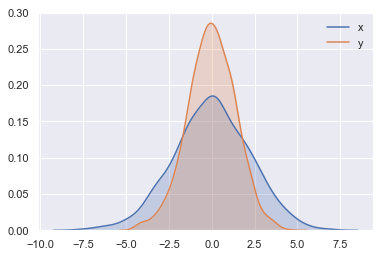

In [78]:
for col in 'xy':
    sns.kdeplot(data[col], shade = True)

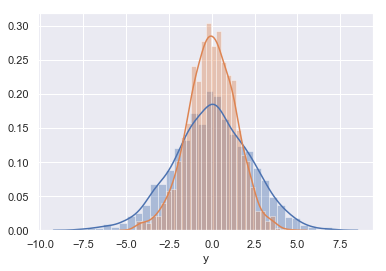

In [79]:
# Why not combine both?
sns.distplot(data['x'])
sns.distplot(data['y']);

## 2D plots: contour, hex and marginal histograms

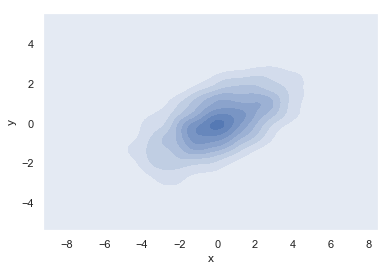

In [80]:
sns.kdeplot(data['x'], data['y'], shade = True);

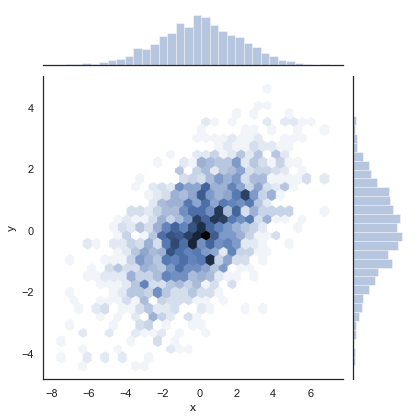

In [81]:
with sns.axes_style('white'):       
    sns.jointplot("x", "y", 
                  data, 
                  kind = 'hex')

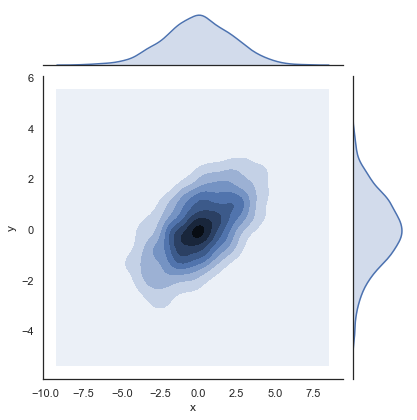

In [82]:
with sns.axes_style('white'):       
    sns.jointplot("x", "y", 
                  data, 
                  kind = 'kde') # Changing the kind of the plot changes from 
                                # hex + marginal histograms to 2D + marginal 
                                # density plots

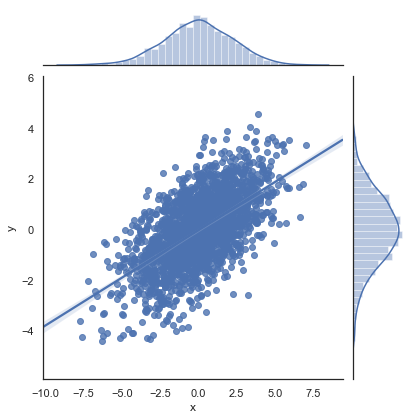

In [83]:
with sns.axes_style('white'):       
    sns.jointplot("x", "y", 
                  data, 
                  kind = 'reg') # reg adds a regression line

## Facetting

- As we saw in our `ggplot2` unit, facetting is another powerful visualisation tool that allows us to observe The effects of multiple levels in two categorical variables on a third numerical or categorical one, by using a matrix of plots of the same general type. 

- `Seaborn` provides a relatively straightforward interface to facetting. First, let's get some data, this time related to tipping in restaurants:

In [84]:
tips = sns.load_dataset('tips') # Load dataset
print("Size of Dataset:" + str(tips.shape))
print("Columns:" + str(tips.columns.values))

# Add a column containing the % value of a tip in terms of the total bill
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill'] 

tips.head()

Size of Dataset:(244, 7)
Columns:['total_bill' 'tip' 'sex' 'smoker' 'day' 'time' 'size']


,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


- We can now perform some preliminary exploration of this data, to examine, e.g., if the sex of the customer or the meal time have any easily identifiable effects on the amount tipped:

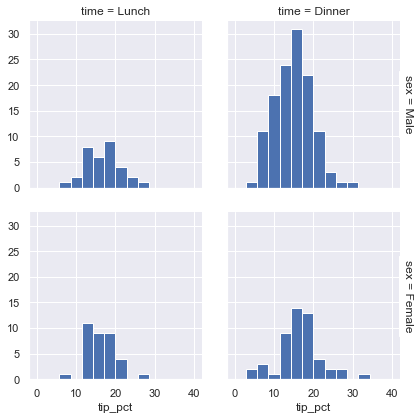

In [85]:
grid = sns.FacetGrid(tips, 
                     row = "sex", col = "time", 
                     margin_titles = True)

grid.map(plt.hist,                       # type of plot to use
         "tip_pct",                      # response variable to use
         bins = np.linspace(0, 40, 15)); # binning to use for the histogram

## Boxplots

- Another staple of data analysis is the boxplot, which summarises the distribution of a continuous variable (possibly stratified by a categorical predictor) in terms of five summary quantities (+ special indication of outliers). 

- `Seaborn` provides the `catplot()` function that enables us to build boxplots quite easily. 

- `catplot()` actually provides access to several different types of plots that show the relationship between a numerical and one or more categorical variables, different visual representations. The `kind` parameter in `catplot()` is used to determine the type of visualisation.

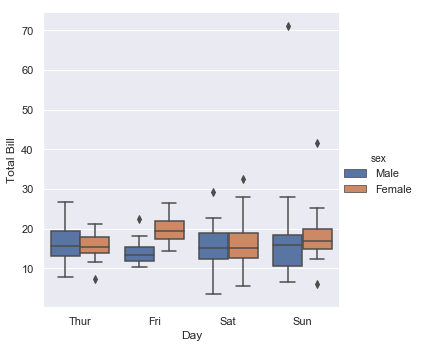

In [86]:
g = sns.catplot(x    = "day",        
                y    = "tip_pct", 
                hue  = "sex", 
                data = tips, 
                kind = "box")

g.set_axis_labels("Day", "Total Bill"); # <-- get better labelling for the axes

- As mentioned above, `catplot` allows several different types of visualisations:

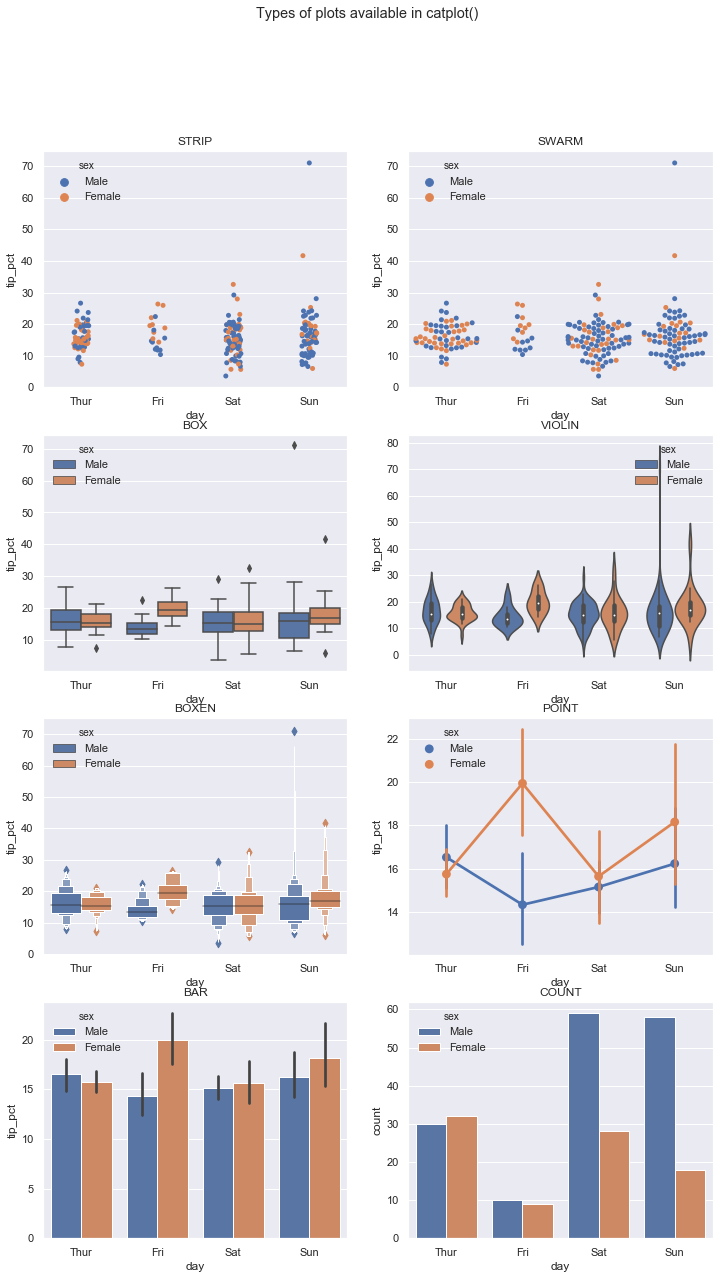

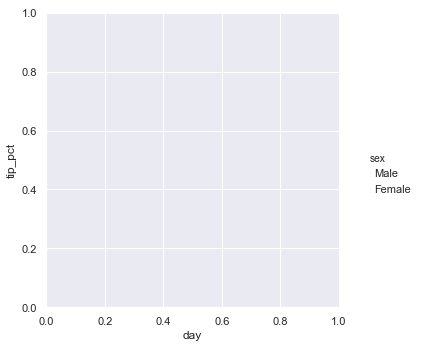

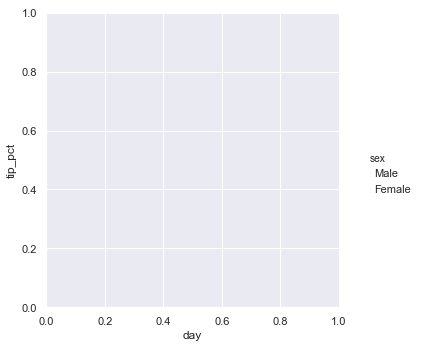

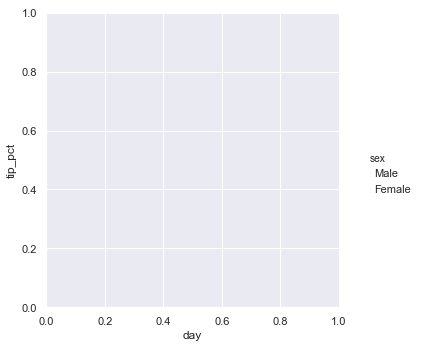

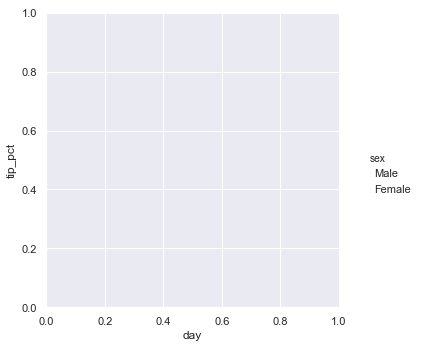

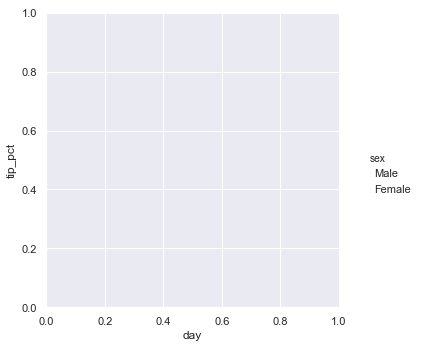

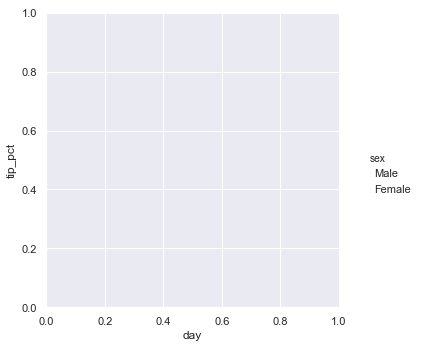

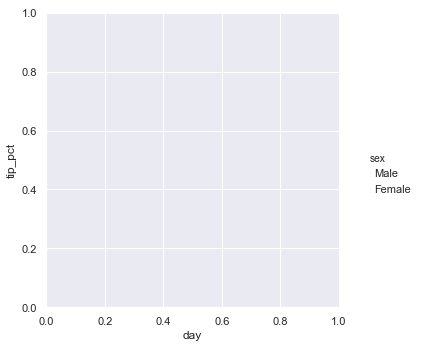

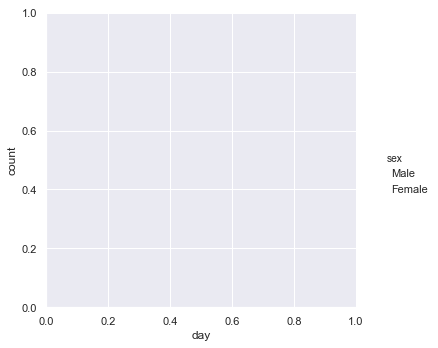

In [87]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (12, 20))
fig.suptitle('Types of plots available in catplot()')

plt_kinds = ["strip",  # the default
             "swarm",
             "box",
             "violin",
             "boxen",
             "point",
             "bar"]

for ax, pltk in zip(axes.flatten(), plt_kinds):
    sns.catplot(ax = ax, data = tips, kind = pltk,
                x = "day", y = "tip_pct", hue = "sex");
    ax.set(title = pltk.upper())

# Count plots have a slightly different syntax, so I'll generate one
# after the for loop
count_ax = axes.flatten()[-1] # select last subplot
sns.catplot(ax = count_ax,
            kind = "count",
            x = "day", hue = "sex", data = tips);
count_ax.set(title = "COUNT");